In [4]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

def fluxLimEquation(dat,FWHMres,sn,res):

    SIGMA   =   np.nanstd(dat,axis=0)#np.nanmedian(err,axis=0)
    fLim    =   sn*np.sqrt(2*FWHMres/res)*SIGMA*res
    med,std=np.median(fLim),np.std(fLim)
    for i in range(0,len(fLim)): #change 0s for nans
        if fLim[i]<med-0.3*med:
            fLim[i]=np.nan
    return fLim 


m1=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code/CheckRMS/Data/obj_clean000_abs_slits_lin_m1.fits")
m1FluxCalib=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code/CheckRMS/Data/obj_clean000_abs_slits_lin_fluxcalib_m1.fits")
m1FluxCalibTelCorr=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code/CheckRMS/Data/obj_clean000_abs_slits_lin_fluxcalib_tellcorr_m1.fits")

m234=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code/CheckRMS/Data/obj_clean000_abs_slits_lin_mask234.fits")
m234FluxCalibTelCorr=fits.open("obj_clean000_abs_slits_lin_fluxcal_telcor_m234.fits")
m234FluxCalibTelCorrFixed=fits.open("obj_clean000_abs_slits_lin_fluxcal_telcor_m234Fixed.fits")

m1MineFluxCalibTelCorr=fits.open("obj_clean000_abs_slits_lin_fluxcal_telcor_m1Mine.fits")
m1MineFluxCalibTelCorrFixed=fits.open("obj_clean000_abs_slits_lin_fluxcal_telcor_m1MineFixed.fits")
m1CharFluxCalib=fits.open("obj_clean000_abs_slits_lin_fluxcalib_m1char.fits")

In [5]:
FluxLimit1  =   fluxLimEquation(m1[26].data,3.2,5,0.62)
FluxLimit1_FCalib   =   fluxLimEquation(m1FluxCalib[26].data,3.2,5,0.62)
FluxLimit1_FCalibTelCor   =   fluxLimEquation(m1FluxCalibTelCorr[26].data,3.2,5,0.62)
FluxLimit1Char_FCalib   =   fluxLimEquation(m1CharFluxCalib[26].data,3.2,5,0.62)

FluxLimit2  =   fluxLimEquation(m234[12].data,3.2,5,0.62)
FluxLimit2_FCalibTelCor   =   fluxLimEquation(m234FluxCalibTelCorr[12].data,3.2,5,0.62)

FluxLimit2_FCalibTelCorFixed   =   fluxLimEquation(m234FluxCalibTelCorrFixed[12].data,3.2,5,0.62)


FluxLimit1Mine_FCalibTelCor   =   fluxLimEquation(m1MineFluxCalibTelCorr[26].data,3.2,5,0.62)
FluxLimit1MineFixed_FCalibTelCor   =   fluxLimEquation(m1MineFluxCalibTelCorrFixed[26].data,3.2,5,0.62)

/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


<function matplotlib.pyplot.show(close=None, block=None)>

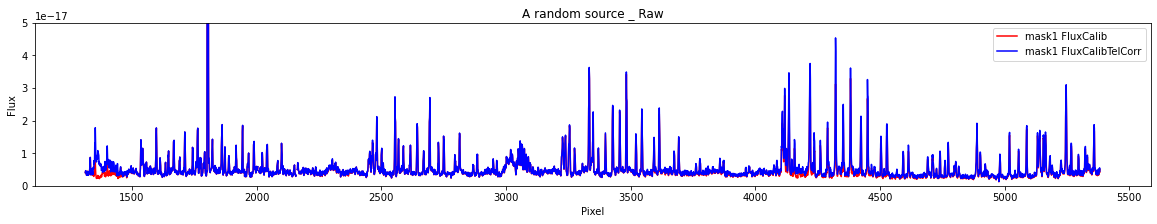

In [8]:
plt.rcParams["figure.figsize"] = (20,3)
plt.title("A random source _ Raw")
#plt.plot(FluxLimit1*1e-17,label="mask1 Raw",color="black")
plt.plot(FluxLimit1_FCalib,label="mask1 FluxCalib",color="red")
plt.plot(FluxLimit1_FCalibTelCor,label="mask1 FluxCalibTelCorr",color="blue")
#plt.plot(FluxLimit1Mine_FCalibTelCor)
#plt.plot(FluxLimit1Char_FCalib,label="Charlotte")
#plt.plot(FluxLimit1MineFixed_FCalibTelCor,label="Gonzalo Fixed")
#plt.plot(FluxLimit2_FCalibTelCorFixed )
#plt.plot(FluxLimit1_FCalibTelCor,label="mask1 FluxCalibTellcorr",color="blue",alpha=0.3)
#plt.plot(FluxLimit2*1e-17,color="gray",ls="--",label="mask2 Raw")
#plt.plot(FluxLimit2_FCalibTelCor*1e-17,color="purple",ls="--",label="mask2 Raw",alpha=0.3)
#plt.plot(FluxLimit3[25],label="mask3")
#plt.plot(FluxLimit4[25],label="mask4")
#plt.axhline(y=np.median(FluxLimit1[0]))
plt.ylim(0e-17,5e-17)
plt.xlabel("Pixel")
plt.ylabel("Flux")
plt.legend(loc="best")
plt.show

In [4]:

print(np.nanmedian(FluxLimit1*1e-17)/np.nanmedian(FluxLimit1_FCalib))

3.1021170947732912


<function matplotlib.pyplot.show(close=None, block=None)>

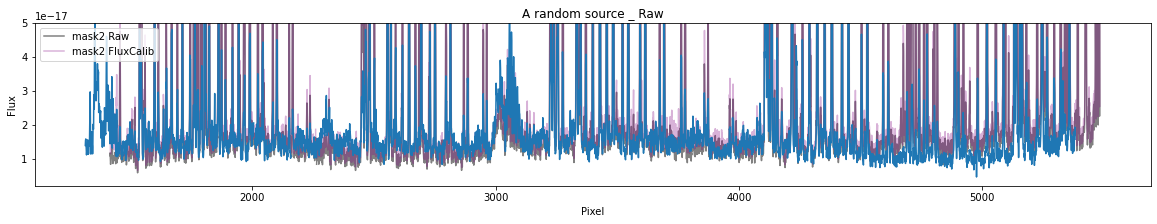

In [15]:
plt.rcParams["figure.figsize"] = (20,3)
plt.title("A random source _ Raw")
#plt.plot(FluxLimit1*1e-17,label="mask1 Raw",color="black")
#plt.plot(FluxLimit1_FCalib,label="mask1 FluxCalib",color="red")
#plt.plot(FluxLimit1_FCalibTelCor,label="mask1 FluxCalibTellcorr",color="blue",alpha=0.3)
plt.plot(FluxLimit2*1e-17,color="gray",label="mask2 Raw")
plt.plot(FluxLimit2_FCalibTelCor,color="purple",label="mask2 FluxCalib",alpha=0.3)
plt.plot(FluxLimit1Mine_FCalibTelCor)
#plt.plot(FluxLimit3[25],label="mask3")
#plt.plot(FluxLimit4[25],label="mask4")
#plt.axhline(y=np.median(FluxLimit1[0]))
plt.ylim(0.2e-17,5e-17)
plt.xlabel("Pixel")
plt.ylabel("Flux")
plt.legend(loc="best")
plt.show

In [6]:
print(np.nanmedian(FluxLimit2*1e-17))
print(np.nanmedian(FluxLimit2_FCalibTelCor))

1.465199e-17
1.6856660491719246e-17


In [8]:
print(np.nanmedian(FluxLimit1*1e-17))
print(np.nanmedian(FluxLimit1_FCalibTelCor))

1.25606665e-17
4.2724207734626415e-18
